**STEP 1**: The installation, importation and upgrade of the necessary libraries for this project.

In [16]:
!pip install yfinance numpy pandas matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**STEP 2**: The creation of a clear interface for the change of ticker, start date and end dates. I never miss this in my codes. This is to ease accessibility. Here, a pipeline to the Yahoo Finance API is created to collect the data based on the ticker, start date and end date

In [17]:
ticker = "MSFT"
start_date = "2020-01-01"
end_date = "2024-11-22"

data = yf.download(ticker, start=start_date, end=end_date)
print(data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           MSFT        MSFT        MSFT        MSFT   
Date                                                                        
2020-01-02 00:00:00+00:00  153.630692  160.619995  160.729996  158.330002   
2020-01-03 00:00:00+00:00  151.717712  158.619995  159.949997  158.059998   
2020-01-06 00:00:00+00:00  152.109909  159.029999  159.100006  156.509995   
2020-01-07 00:00:00+00:00  150.722961  157.580002  159.669998  157.320007   
2020-01-08 00:00:00+00:00  153.123779  160.089996  160.800003  157.949997   
...                               ...         ...         ...         ...   
2024-11-15 00:00:00+00:00  414.170990  415.000000  422.799988  413.640015   
2024-11-18 00:00:00+00:00  414.929474  415.760010  418.399994  412.100006   
2024-11-19 00:00:00+00:00  416.955414  417.790009  417.940002  411.549988   
2024-11-20 00:00:00+00:00  414.659973  415.489990  417.290009  410.579987   

**STEP 3**: Dropping the columns that are not needed for this project. The necessary columns are the CLOSE column and DATE column

In [18]:
data = data.drop(columns=['Adj Close', 'Open', 'Volume', 'High', 'Low'])
print(data)

Price                           Close
Ticker                           MSFT
Date                                 
2020-01-02 00:00:00+00:00  160.619995
2020-01-03 00:00:00+00:00  158.619995
2020-01-06 00:00:00+00:00  159.029999
2020-01-07 00:00:00+00:00  157.580002
2020-01-08 00:00:00+00:00  160.089996
...                               ...
2024-11-15 00:00:00+00:00  415.000000
2024-11-18 00:00:00+00:00  415.760010
2024-11-19 00:00:00+00:00  417.790009
2024-11-20 00:00:00+00:00  415.489990
2024-11-21 00:00:00+00:00  412.869995

[1232 rows x 1 columns]


**STEP 4**: Conversion of the collected data into a dataframe. There are several reasons for this step. One being its importance in data preprocessing. Another being its importance in handling diverse data (float, integer, strings etc). It is a flexibe structure for this purpose. Also, it is also needed in handling missing data.

In [19]:
df = pd.DataFrame(data)
print(df)

Price                           Close
Ticker                           MSFT
Date                                 
2020-01-02 00:00:00+00:00  160.619995
2020-01-03 00:00:00+00:00  158.619995
2020-01-06 00:00:00+00:00  159.029999
2020-01-07 00:00:00+00:00  157.580002
2020-01-08 00:00:00+00:00  160.089996
...                               ...
2024-11-15 00:00:00+00:00  415.000000
2024-11-18 00:00:00+00:00  415.760010
2024-11-19 00:00:00+00:00  417.790009
2024-11-20 00:00:00+00:00  415.489990
2024-11-21 00:00:00+00:00  412.869995

[1232 rows x 1 columns]


**STEP 5**: The **calculate_macd** function calculates the Moving Average Convergence Divergence (MACD) indicator for a DataFrame of stock prices. First, it calculates the 12-day Exponential Moving Average (EMA_12), which responds faster to price changes. Next, it calculates the 26-day Exponential Moving Average (EMA_26), which is slower and provides a longer-term trend.

The MACD Line is the difference between the faster EMA_12 and the slower EMA_26, showing momentum changes. The Signal Line, a 9-day EMA of the MACD Line, smooths the MACD values to identify crossovers for trading signals. Finally, the Histogram is the difference between the MACD Line and the Signal Line, visualizing the strength and direction of momentum.

In [20]:
def calculate_macd(df, short_window=12, long_window=26, signal_window=9):
    df['EMA_12'] = df['Close'].ewm(span=short_window, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=long_window, adjust=False).mean()
    df['MACD_Line'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD_Line'].ewm(span=signal_window, adjust=False).mean()
    df['Histogram'] = df['MACD_Line'] - df['Signal_Line']
    return df

df = calculate_macd(df)
print(df[['EMA_12', 'EMA_26', 'MACD_Line', 'Signal_Line','Histogram']])

Price                          EMA_12      EMA_26 MACD_Line Signal_Line  \
Ticker                                                                    
Date                                                                      
2020-01-02 00:00:00+00:00  160.619995  160.619995  0.000000    0.000000   
2020-01-03 00:00:00+00:00  160.312303  160.471847 -0.159544   -0.031909   
2020-01-06 00:00:00+00:00  160.115025  160.365043 -0.250018   -0.075531   
2020-01-07 00:00:00+00:00  159.725022  160.158744 -0.433722   -0.147169   
2020-01-08 00:00:00+00:00  159.781172  160.153652 -0.372480   -0.192231   
...                               ...         ...       ...         ...   
2024-11-15 00:00:00+00:00  420.702276  420.678203  0.024073   -0.177258   
2024-11-18 00:00:00+00:00  419.941928  420.313893 -0.371965   -0.216199   
2024-11-19 00:00:00+00:00  419.610863  420.126938 -0.516075   -0.276174   
2024-11-20 00:00:00+00:00  418.976883  419.783461 -0.806578   -0.382255   
2024-11-21 00:00:00+00:00

**STEP 6**: Plotting the chart

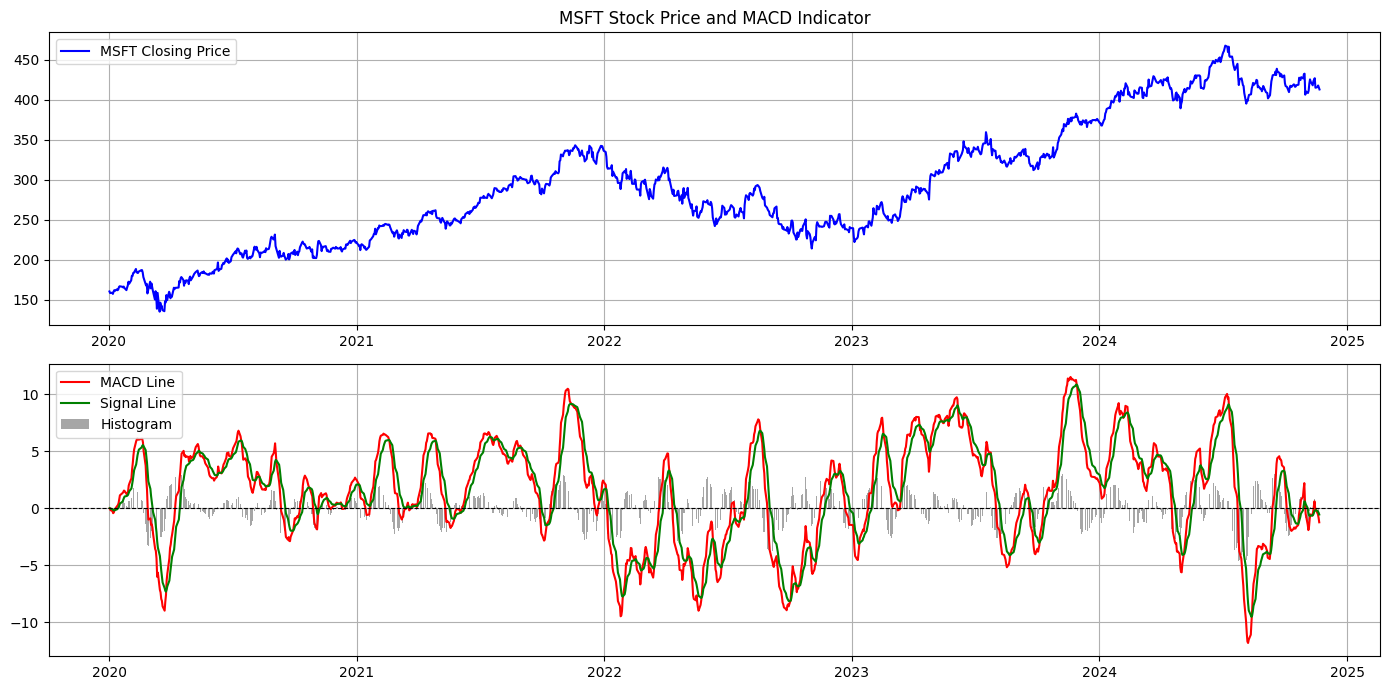

In [21]:
def plot_macd(df, ticker):
    plt.figure(figsize=(14, 7))

    plt.subplot(2, 1, 1)
    plt.plot(df['Close'], label=f"{ticker} Closing Price", color='blue')
    plt.title(f"{ticker} Stock Price and MACD Indicator")
    plt.legend(loc='upper left')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(df['MACD_Line'], label='MACD Line', color='red')
    plt.plot(df['Signal_Line'], label='Signal Line', color='green')
    plt.bar(df.index, df['Histogram'], label='Histogram', color='gray', alpha=0.7)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_macd(df, ticker)